In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
raw_df = pd.read_csv('data/005930.KS_3MA_5MA.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


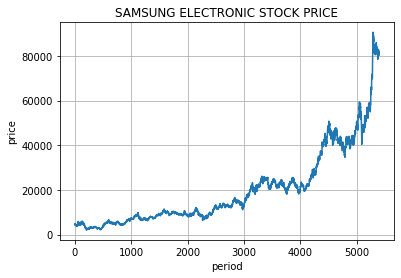

In [3]:
plt.title('SAMSUNG ELECTRONIC STOCK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()
plt.plot(raw_df['Adj Close'], label='Adj Close')

In [4]:
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


In [5]:
raw_df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [6]:
for col in raw_df.columns:
    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [7]:
raw_df.loc[raw_df['Volume'] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3979.839355,0.0,4010.871419,4097.760644
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3972.081543,0.0,3889.329834,3914.672510
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,5275.420410,0.0,5353.000163,5345.242773
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5360.757324,0.0,5409.891439,5495.746680
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4654.781250,0.0,4499.622070,4443.765039
...,...,...,...,...,...,...,...,...,...
4623,2018-04-30,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47560.473960,46736.421880
4624,2018-05-02,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47194.763280
4625,2018-05-03,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47663.931250
5077,2020-03-09,56500.0,56500.0,56500.0,56500.0,53774.468750,0.0,54186.897140,53983.855470


In [8]:
# 각 column에 0갯수 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print(col + ': '+str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 116
3MA: 0
5MA: 0


In [9]:
# Volume 값 0을 NaN으로 대체
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

In [10]:
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col] == 0].shape[0]
    print(col + ': '+str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [11]:
raw_df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [12]:
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [13]:
# 정규화(Data 제외한 수치부분 정규화)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '3MA', '5MA']
scale_df = scaler.fit_transform(raw_df[scale_cols])
scale_df = pd.DataFrame(scale_df, columns=scale_cols)
scale_df

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.025192,0.025698
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.025634,0.025094
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.026163,0.025343
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.025987,0.025503
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.026163,0.026018
...,...,...,...,...,...,...,...,...
5264,0.891750,0.830923,0.896647,0.881047,0.885878,0.064088,0.895299,0.903144
5265,0.892890,0.834113,0.897795,0.885578,0.890399,0.061199,0.894920,0.900854
5266,0.899727,0.841557,0.903537,0.895774,0.900571,0.091190,0.897955,0.902457
5267,0.895169,0.835177,0.898944,0.885578,0.890399,0.085145,0.899472,0.902228


In [14]:
# 입력 파라미터 feature, label => numpy type
def make_sequence_dataset(feature, label, window_size):
    feature_list=[]
    label_list=[]
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:window_size+i])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list), np.array(label_list)

In [15]:
feature_cols = ['3MA', '5MA', 'Adj Close']
label_cols = ['Adj Close']

feature_df = pd.DataFrame(scale_df, columns=feature_cols)
label_df = pd.DataFrame(scale_df, columns=label_cols)

In [16]:
# DataFrame => Numpy
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()
print(feature_np.shape, label_np.shape)

(5269, 3) (5269, 1)


In [17]:
window_size=40
X, Y = make_sequence_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


In [18]:
split = int(len(X)*0.95)

x_train = X[0:split]
y_train = Y[0:split]
x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4967, 40, 3) (4967, 1) (262, 40, 3) (262, 1)


In [19]:
model = Sequential()

model.add(LSTM(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(x_train, y_train, 
          batch_size=16, 
          epochs=100, 
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/100
311/311 [==============================] - 4s 12ms/step - loss: 2.4600e-05 - mae: 0.0034 - val_loss: 2.6216e-04 - val_mae: 0.0122
Epoch 2/100
311/311 [==============================] - 4s 12ms/step - loss: 2.5911e-05 - mae: 0.0034 - val_loss: 2.5868e-04 - val_mae: 0.0121
Epoch 3/100
311/311 [==============================] - 4s 12ms/step - loss: 2.5045e-05 - mae: 0.0033 - val_loss: 6.6933e-04 - val_mae: 0.0222
Epoch 4/100
311/311 [==============================] - 4s 12ms/step - loss: 2.4704e-05 - mae: 0.0034 - val_loss: 1.7719e-04 - val_mae: 0.0096
Epoch 5/100
311/311 [==============================] - 4s 12ms/step - loss: 2.3460e-05 - mae: 0.0032 - val_loss: 3.2196e-04 - val_mae: 0.0139
Epoch 6/100
311/311 [==============================] - 4s 12ms/step - loss: 2.3238e-05 - mae: 0.0033 - val_loss: 1.7430e-04 - val_mae: 0.0099
Epoch 7/100
311/311 [==============================] - 4s 12ms/step - loss: 2.3211e-05 - mae: 0.0033 - val_loss: 2.1377e-04 - val_mae: 0.0107
Epoch 

9/9 [==============================] - 0s 7ms/step
0.016405518126354577


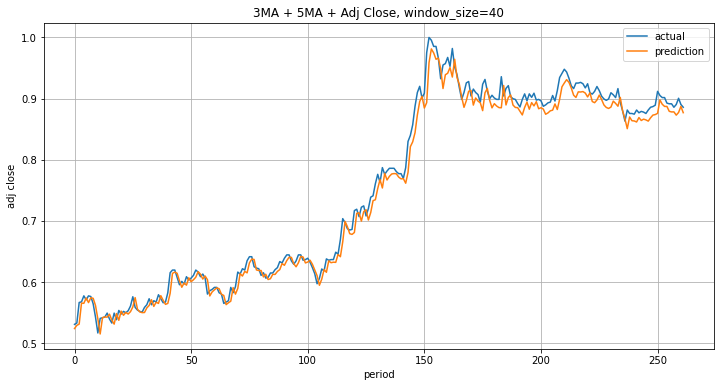

In [23]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

# 평균절대값백분율오차계산(MAPE)
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))